In [40]:
import pandas as pd
import re
import numpy as np
import pycountry
#pd.set_option('display.max_rows', None)
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
import pyodbc as Context
import plotly.express as ex
output_notebook()

Loading BokehJS ...

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'>Data Cleansing</p>
<hr style='color:white;'>

In [41]:
df = pd.read_csv('C:\\csv-data-collect\\job-data.csv',encoding='latin')

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>DUPLICATES</p>
<hr style='color:#BA704F;'>

In [42]:
df.duplicated().sum()

202

In [43]:
df.drop_duplicates(inplace=True)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Salary</p>
<hr style='color:#BA704F;'>

In [44]:
df['Salary'].replace(np.nan, "0",inplace=True)
#df.loc[df['Salary'] == "0"]

In [45]:
df.loc[df['Salary'] == '0'].shape

(172, 8)

In [46]:
df.loc[(df['Salary'] == "0") & (df['Job Type'] != 'Internship')].shape

(100, 8)

In [47]:
df.drop(df.loc[(df['Salary'] == "0") & (df['Job Type'] != 'Internship')].index,inplace=True)

In [48]:
def ConvertToIntger(string):
    Money_pattern = re.compile("["
                           u"GBP"
                           u"EUR"
                           u"K"
                           u"+"
                           u"*"
                           "]+"
                           , flags=re.UNICODE)
    return int(Money_pattern.sub(r'', string)) * 1000

df['Salary'] = df['Salary'].apply(ConvertToIntger)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Company</p>
<hr style='color:#BA704F;'>

In [49]:
df.drop(df.loc[df['Company'].isna()].index,inplace=True)

In [50]:
df.loc[df['Company'].isna()]

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities


<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Experience level</p>
<hr style='color:#BA704F;'>

In [51]:
df['Experience level'].isna().sum()

224

In [52]:
df['Experience level'].fillna('not specified',inplace=True)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Requirment of the company</p>
<hr style='color:#BA704F;'>

In [53]:
def GetJobsName(text):
    return text.split(',')
req_name_Ge_0 = []
for x in df['Requirment of the company '].apply(GetJobsName):
    for y in x:
        req_name_Ge_0.append(y)

req_name_df = pd.DataFrame(req_name_Ge_0)
req_name_df.rename(columns={0:"Requirment of the company"},inplace=True)
Indexies = req_name_df.loc[req_name_df['Requirment of the company'] ==''].index
req_name_df.drop(Indexies,inplace=True)
req_name_df = pd.DataFrame(req_name_df['Requirment of the company'].unique().tolist())
Tags_name_df = req_name_df.rename(columns={0:"Tags"})

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Job Title</p>
<hr style='color:#BA704F;'>

In [54]:
job__names = {
    "Data Science":[
        "Research Scientist",
        "Statistics and Probability",
        "Applied Scientist",
        "Decision Scientist"
    ],
    "Data engineer":[
        "Data Engineer Scientist",
        "Data Engineer",
        "IT Data Engineer",
    ],
    "Data analysis":[
        "Data Developer",
        "Data analysis",
        "Insight Analyst",
        "Data Analyst",
        "Marketing Analytics",
        "DB/ETL Developer",
        "Développeur ETL", 
        "Business Intelligence",
        "BI Developer",
        "BI Analyst"
    ],
    "AI":[
        "AI Engineer"
        "Principal Product Marketing Manager, AI & Mach",
        "Lead Machine Learning Engineer",
        "Machine Learning",
        "AI/ML",
        "ML Engineer",
        "Natural Language Processing",
        "MLOps Engineer",
        "NLP Scientist",
        "AI Product Owner",
        "ChatGPT Consultant",
        "AI Product Owner",
        "Computer Vision"
    ],
    "Big Data":[
        "Big Data Engineer",
        "Big Data",
        "Senior Big Data",
        "PySpark",
        "Cloud storage",
        "Cloud Data",
        "Cloud Engineer",
        "DevOps Engineer",
        "Technical Architect Databricks",
        "Data Modeler"
    ],
    "Developer":[
        "React Native",
        "HTML Developer"
        "HTML"
    ]
}

In [55]:
def find_job_title(text):
    Best_matched = None
    Best__Score = 0

    for job__name in job__names:
        for x in job__names[job__name]:
            score = fuzz.WRatio(text,x)
            if score > Best__Score:
                Best__Score = score
                Best_matched = job__name
    if Best__Score >= 86:
        return Best_matched
    else:
        return text


df['Job Title'] = df['Job Title'].apply(find_job_title)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Location</p>
<hr style='color:#BA704F;'>

In [56]:
def DetectCountry(txt):
    for country in pycountry.countries:
        if country.name in txt or country.alpha_3 in txt:
            ctry = country.name
            break
        elif ('LATAM' in txt):
            return 'Latin America'
        elif ('Tallinn' in txt):
            return 'Estonia'
        elif ('Remote' in txt):
            return 'Remote'
        elif ('New York' in txt):
            return 'United States'
        else:
            ctry = 'Not found'
    return ctry
df['Country'] = df['Location'].apply(DetectCountry)

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'> Data analysis & visualization</p>
<hr style='color:white;'>

<hr style='color:#BA704F;'>
<u style='color:#6C3428;font-size:20px;text-decoration: none;'>
  <li>identify the key trends in the job market for AI, DS, and Big Data?</li>
  <li>the most demanded skills and the most common job titles in these fields?</li>
  <li>How do you analyze the differences and similarities between job opportunities in AI, DS, and Big Data?</li>
</u>
<hr style='color:#BA704F;'>

<Axes: xlabel='Job Title'>

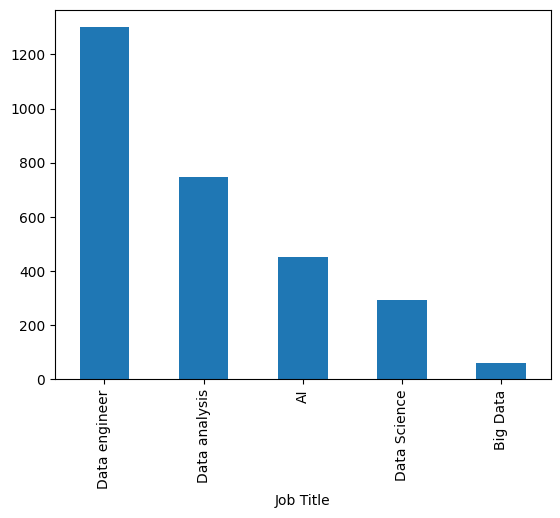

In [57]:
df['Job Title'].value_counts().sort_values(ascending=False).head().plot(kind = 'bar')

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>The highest paid domains.</p>
<hr style='color:#BA704F;'>

<Axes: >

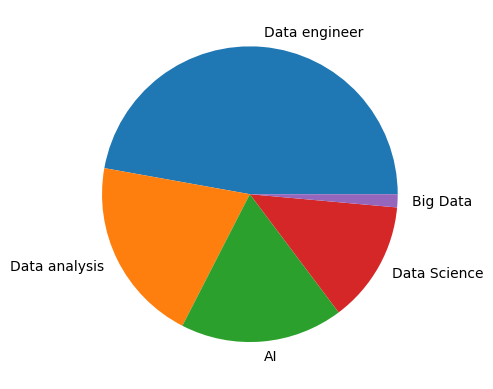

In [58]:
df.groupby('Job Title').apply(lambda x:x['Salary'].sum()).sort_values(ascending=False).head().plot.pie()
# Check The Func working (Testing).
# df.loc[df['Job Title'] == 'Data analysis']['Salary'].max()

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Job Type Graph</p>
<hr style='color:#BA704F;'>

([<matplotlib.patches.Wedge at 0x198ceff57d0>,
 [Text(-1.096320269461012, 0.08989920338320195, 'Full Time'),
  Text(1.0957327614935846, -0.09679729019783234, 'Internship'),
  Text(1.0999782140093104, -0.0069230560367338715, 'Part Time')])

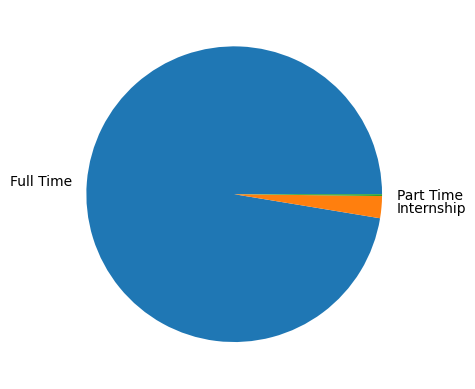

In [27]:
labels = df['Job Type'].value_counts().reset_index()['Job Type']
sizes = df['Job Type'].value_counts().reset_index()['count']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>The highest spends countriesin data domain</p>
<hr style='color:#BA704F;'>

In [19]:
ex.choropleth(df.groupby('Country')['Salary'].sum().reset_index(),
                    locations='Country', 
                    locationmode='country names',
                    color='Salary',
                    title='Geographical distribution of Salaries',
                    color_continuous_scale=ex.colors.sequential.Bluered)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Top 3 paid countries.</p>
<hr style='color:#BA704F;'>

In [70]:
Top_3_paid_countries =  df[(df['Country']!='Remote') & (df['Country']!='Not found')].groupby('Country')['Salary'].sum().nlargest(3).reset_index(name='Total')

In [71]:
data = Top_3_paid_countries
fig = ex.bar(data, x='Country', y='Total')
fig.show()

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>the most requested jobs based on the experience level.</p>
<hr style='color:#BA704F;'>

In [81]:
Top_3_paid_countries =  df[(df['Country']!='Remote') & (df['Job Title']!='Not found')].groupby('Job Title')['Salary'].sum().nlargest(3).reset_index(name='Total')
lst = []
[lst.append(x['Job Title']) for index,x in Top_3_paid_countries.iterrows()]

for x in range(len(lst)):
    df.loc[df['Job Title'] == lst[x]].groupby('Experience level').apply(lambda x:x[['Salary','Job Title']].max()).reset_index()



In [83]:
# Assuming you already have the data frame named 'df'
Top_3_paid_countries = df[(df['Country'] != 'Remote') & (df['Country'] != 'Not found')].groupby('Job Title')['Salary'].sum().nlargest(3).reset_index(name='Total')

lst = []
[lst.append(x['Job Title']) for index,x in Top_3_paid_countries.iterrows()]

# Create an empty list to hold the data for the new data frame
result_data = []

for x in range(len(lst)):
    max_salary_by_exp_level = df.loc[df['Job Title'] == lst[x]].groupby('Experience level').apply(lambda x: x.loc[x['Salary'].idxmax()])[['Experience level', 'Salary', 'Job Title']].reset_index(drop=True)
    result_data.extend(max_salary_by_exp_level.values.tolist())

# Create the new data frame
new_df = pd.DataFrame(result_data, columns=['Experience level', 'Salary', 'Job Title'])

new_df


,Experience level,Salary,Job Title
0,Entry-level,153000,Data engineer
1,Executive-level,230000,Data engineer
2,Mid-level,161000,Data engineer
3,Senior-level,283000,Data engineer
4,not specified,183000,Data engineer
5,Entry-level,125000,Data analysis
6,Executive-level,183000,Data analysis
7,Mid-level,142000,Data analysis
8,Senior-level,180000,Data analysis
9,not specified,105000,Data analysis


In [86]:
long_df = new_df
fig = ex.bar(long_df, x="Job Title", y="Salary", color="Experience level", title="Compare the experience level based on the Job Title.")
fig.show()

<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'> Data <b><i>Modeling</i></b> & <b><i>Storage</i></b></p>
<hr style='color:white;'>

<hr style='color:#BA704F;'>
<u style='color:crimson;font-size:20px;text-decoration: none;'>
  <li>Entity-Relationship Model (ERM):</li>
  <li>Entity-Relationship Diagram (ERD):</li>
  <li>Insert into the database:</li>
</u>
<hr style='color:#BA704F;'>

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Location Table (Countries)</p>
<hr style='color:#BA704F;'>

In [168]:
Countries_df = pd.DataFrame(df['Country'].unique().tolist()).rename(columns={0:"Countries"})

In [169]:
Countries_Table_List = []
for index,x in Countries_df.iterrows():
    index = index + 1
    Countries_Table_List.append({'id':index,'Name':x.Countries})

Countries_Table = pd.DataFrame(Countries_Table_List)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Experience level (levels)</p>
<hr style='color:#BA704F;'>

In [170]:
Levels_df = pd.DataFrame(df['Experience level'].unique().tolist()).rename(columns={0:"Levels"})

In [171]:
Levels_Table_List = []
for index,x in Levels_df.iterrows():
    index = index + 1
    Levels_Table_List.append({'id':index,'Name':x.Levels})

Levels_Table = pd.DataFrame(Levels_Table_List)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Company Table (Companies)</p>
<hr style='color:#BA704F;'>

In [172]:
Companies_df = pd.DataFrame(df['Company'].unique().tolist()).rename(columns={0:"Companies"})

In [173]:
Companies_Table_List = []
for index,x in Companies_df.iterrows():
    index = index + 1
    Companies_Table_List.append({'id':index,'Name':x.Companies})

Companies_Table = pd.DataFrame(Companies_Table_List)

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Job Type Table (job types)</p>
<hr style='color:#BA704F;'>

In [174]:
Job_Types_df = pd.DataFrame(df['Job Type'].unique().tolist()).rename(columns={0:"Job_Types"})

In [175]:
Job_Types_List = []
for index,x in Job_Types_df.iterrows():
    index = index + 1
    Job_Types_List.append({'id':index,'Name':x.Job_Types})

Job_Types_Table = pd.DataFrame(Job_Types_List)
Job_Types_Table

,id,Name
0,1,Full Time
1,2,Internship
2,3,Part Time


<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>jobs offer Table (jobs_offer)</p>
<hr style='color:#BA704F;'>

In [176]:
# relationship between Job Type and Jobs Offers
for index,T in Job_Types_Table.iterrows():
    df['Job Type'].replace(T['Name'],T['id'],inplace=True)
# relationship between Countries and Jobs Offers
for index,C in Countries_Table.iterrows():
    df['Country'].replace(C['Name'],C['id'],inplace=True)
# relationship between Experience level and Jobs Offers
for index,L in Levels_Table.iterrows():
    df['Experience level'].replace(L['Name'],L['id'],inplace=True)
# relationship between Company and Jobs Offers
for index,L in Companies_Table.iterrows():
    df['Company'].replace(L['Name'],L['id'],inplace=True)

In [177]:
df.insert(0,'id',range(1,len(df) + 1))

In [196]:
df_To_Insert = df[['id','Job Type','Company','Experience level','Country','Job Title','Salary','Location']]
df_To_Insert.rename(columns={'Job Type':'Job_Type','Experience level':'Levels','Job Title':'Title'},inplace=True)

C:\Users\Youcode\AppData\Local\Temp\ipykernel_71648\4041123287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_To_Insert.rename(columns={'Job Type':'Job_Type','Experience level':'Levels','Job Title':'Title'},inplace=True)


<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>Requirment of the company Table (Tags)</p>
<hr style='color:#BA704F;'>

In [179]:
# req_Table_List = []
# for index,x in Tags_name_df.iterrows():
#     index = index + 1
#     req_Table_List.append({'id':index,'Name':x.Tags})

# Tags_Table = pd.DataFrame(req_Table_List)

In [203]:
Tag_Tabel_List = []

for index,rec in df[['id','Requirment of the company ']].iterrows():
    for r in rec['Requirment of the company '].split(','):
        if r != '':
            Tag_Tabel_List.append(dict(Job_ID=rec['id'],Name=r))

Tag_Tabel_df = pd.DataFrame(Tag_Tabel_List)
Tag_Tabel_df.drop_duplicates(inplace=True)


<hr style='color:white;'>
<p style='color:orange;font-size:20px;text-align:center;'><b><i> INSERT INTO SQL</i></b></p>
<hr style='color:white;'>

In [181]:
server = 'LAPTOP-VQCV01FE\SQLEXPRESS' 
database = 'job_opportunities' 
username = '' 
password = '' 
cnxn = Context.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password,autocommit=True)
cursor = cnxn.cursor()

cursor.execute("SELECT @@version;") 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) 
	Oct  8 2022 05:58:25 
	Copyright (C) 2022 Microsoft Corporation
	Express Edition (64-bit) on Windows 10 Pro 10.0 <X64> (Build 22621: ) (Hypervisor)



<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>INSERT INTO COUNTRIES</p>
<hr style='color:#BA704F;'>

In [182]:
for row in Countries_Table.itertuples():
    cursor.execute(
        f'''
            INSERT INTO Countries
            VALUES (?,?)
        ''',
        row.id,
        row.Name
    )

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>INSERT INTO JOB TYPES</p>
<hr style='color:#BA704F;'>

In [183]:
for row in Job_Types_Table.itertuples():
    cursor.execute(
        f'''
            INSERT INTO jobTypes
            VALUES (?,?)
        ''',
        row.id,
        row.Name
    )

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>INSERT INTO COMPANIES</p>
<hr style='color:#BA704F;'>

In [184]:
for row in Companies_Table.itertuples():
    cursor.execute(
        f'''
            INSERT INTO Companies
            VALUES (?,?)
        ''',
        row.id,
        row.Name
    )

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>INSERT INTO LEVELS</p>
<hr style='color:#BA704F;'>

In [186]:
for row in Levels_Table.itertuples():
    cursor.execute(
        f'''
            INSERT INTO Levels
            VALUES (?,?)
        ''',
        row.id,
        row.Name
    )

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>INSERT INTO JOBS OFFERS</p>
<hr style='color:#BA704F;'>

In [198]:
for row in df_To_Insert.itertuples():
    cursor.execute(
        f'''
            INSERT INTO Job_Offer
            VALUES (?,?,?,?,?,?,?,?)
        ''',
        row.id,
        row.Job_Type,
        row.Company,
        row.Levels,
        row.Country,
        row.Title,
        row.Salary,
        row.Location
    )

<hr style='color:#BA704F;'>
<p style='color:#6C3428;font-size:20px;text-align:center;'>INSERT INTO TAGS</p>
<hr style='color:#BA704F;'>

In [207]:
for row in Tag_Tabel_df.itertuples():
    cursor.execute(
        f'''
            INSERT INTO Tags
            VALUES (?,?)
        ''',
        row.Job_ID,
        row.Name
    )